# Trabajo semanal N°13

## 1) Sintetizar la transferencia cargada

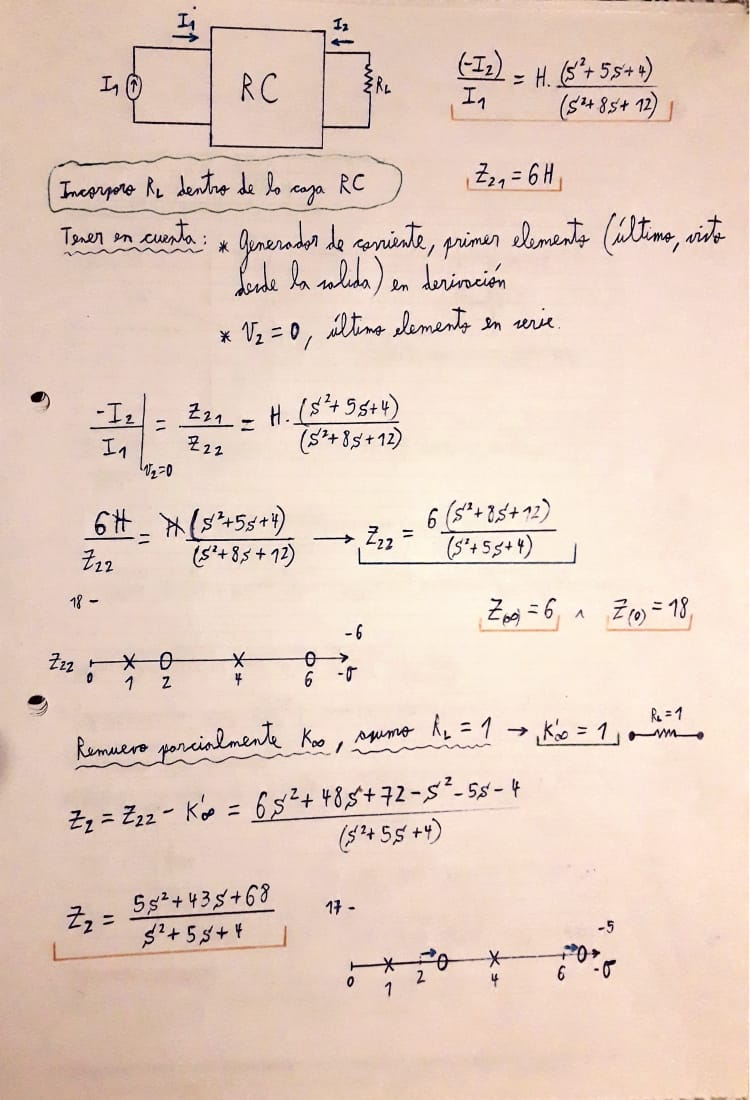

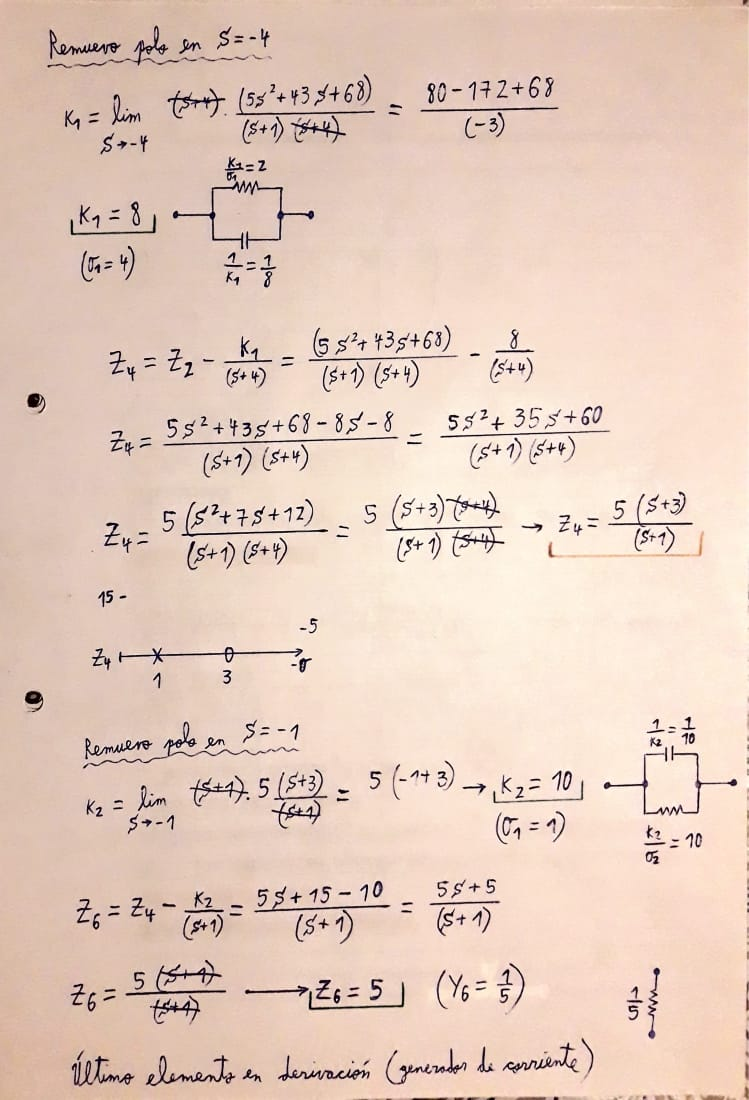

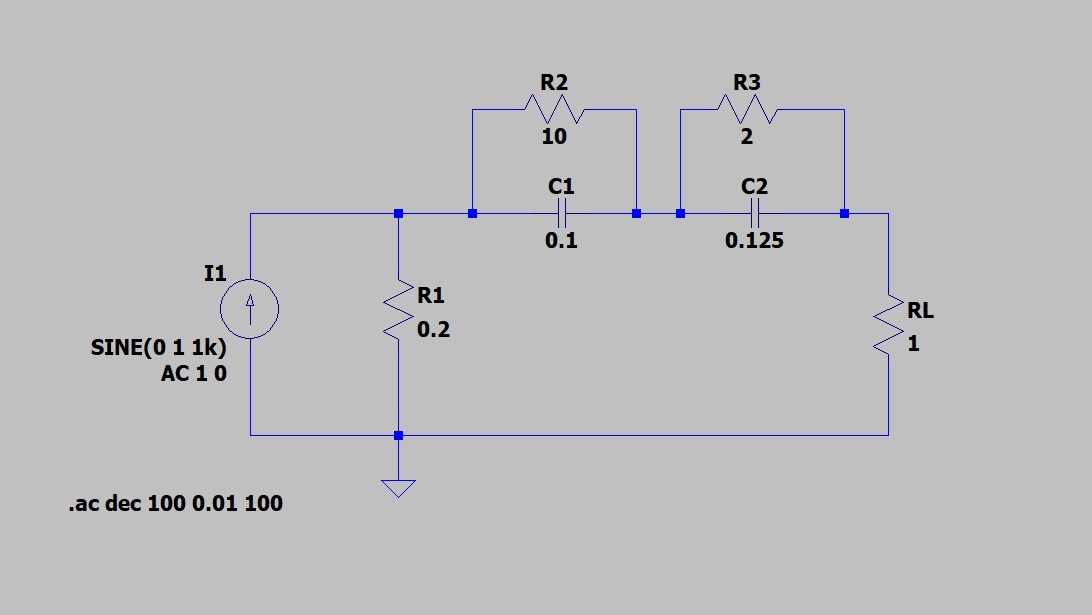

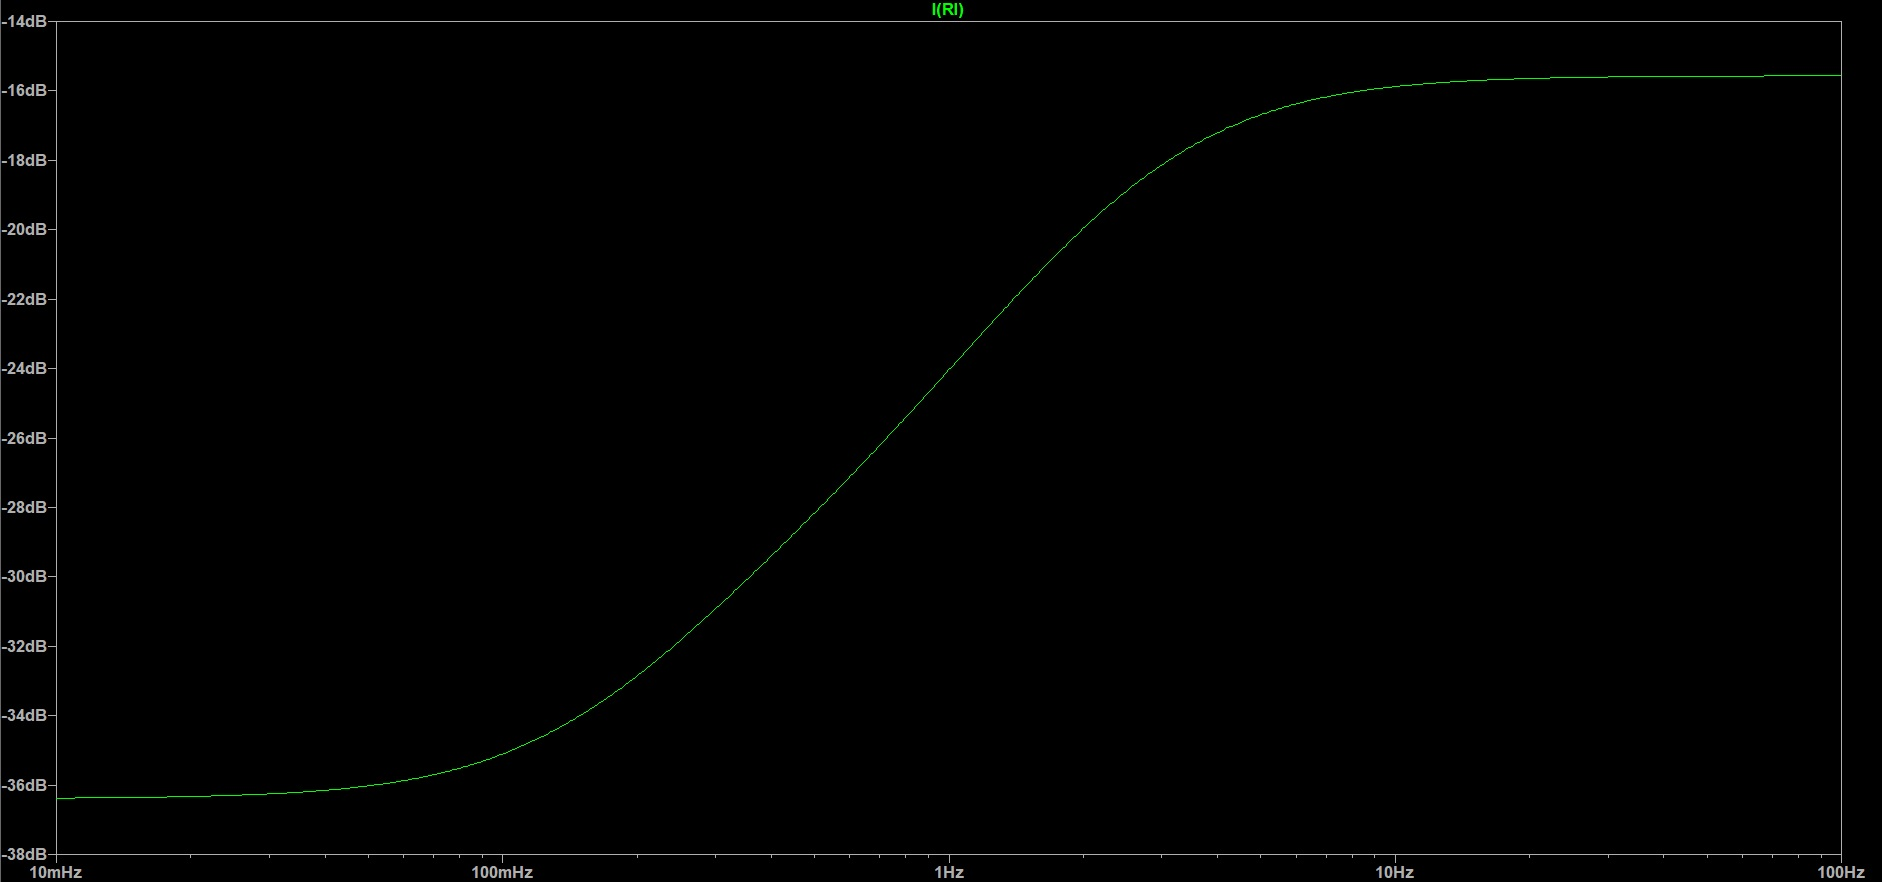

Se puede observar el comportamiento resistivo tanto en "frecuencia cero" como en el infinito.

In [1]:
# Módulos importantantes
import sympy as sp
import splane as tc2
from schemdraw import Drawing
from schemdraw.elements import  Resistor, Capacitor, Inductor
import numpy as np

s = sp.symbols('s ', complex=True)

ZZ = 6*(s**2+8*s+12)/(s**2+5*s+4)

#Remuevo parcialmente el polo en infinito, obtengo RL

RL = 1

Z2 = sp.factor(sp.simplify(sp.expand(ZZ - RL)))

#Remuevo el polo en s=-4

Z4, Z3, R1, C1 = tc2.remover_polo_sigma(Z2, 4, isImpedance = True)

#Remuevo el polo en s=-1

Z6, Z5, R2, C2 = tc2.remover_polo_sigma(Z4, 1, isImpedance = True)

#Obtengo el ultimo componente

G3 = 1/Z6

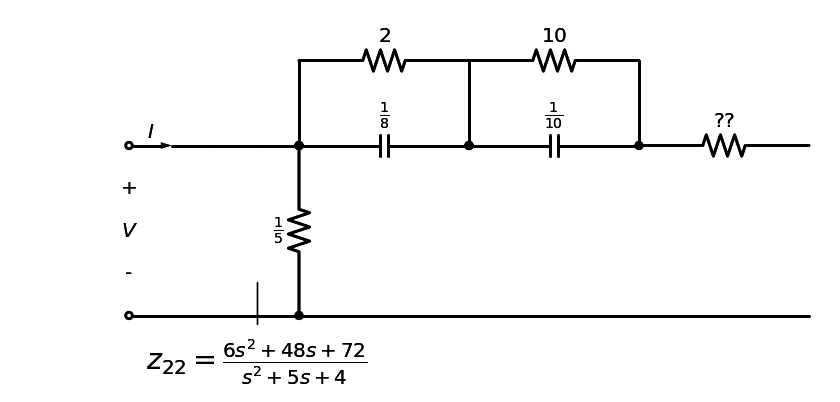

In [4]:

d = Drawing(unit=4)  # unit=2 makes elements have shorter than normal leads

d = tc2.dibujar_puerto_entrada(d,
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d, zz_lbl = tc2.dibujar_funcion_exc_abajo(d, 
                                          'z_{22}',  
                                          ZZ, 
                                          hacia_salida = False,
                                          k_gap_width = 0.5)

d = tc2.dibujar_elemento_derivacion(d, Resistor, G3)
d = tc2.dibujar_tanque_RC_serie(d, R1, C1)
d = tc2.dibujar_tanque_RC_serie(d, R2, C2)
d = tc2.dibujar_elemento_serie(d, Resistor, RL)

display(d)


# Sintetizar un cuadripolo pasivo que cumpla con la siguiente transimpedancia



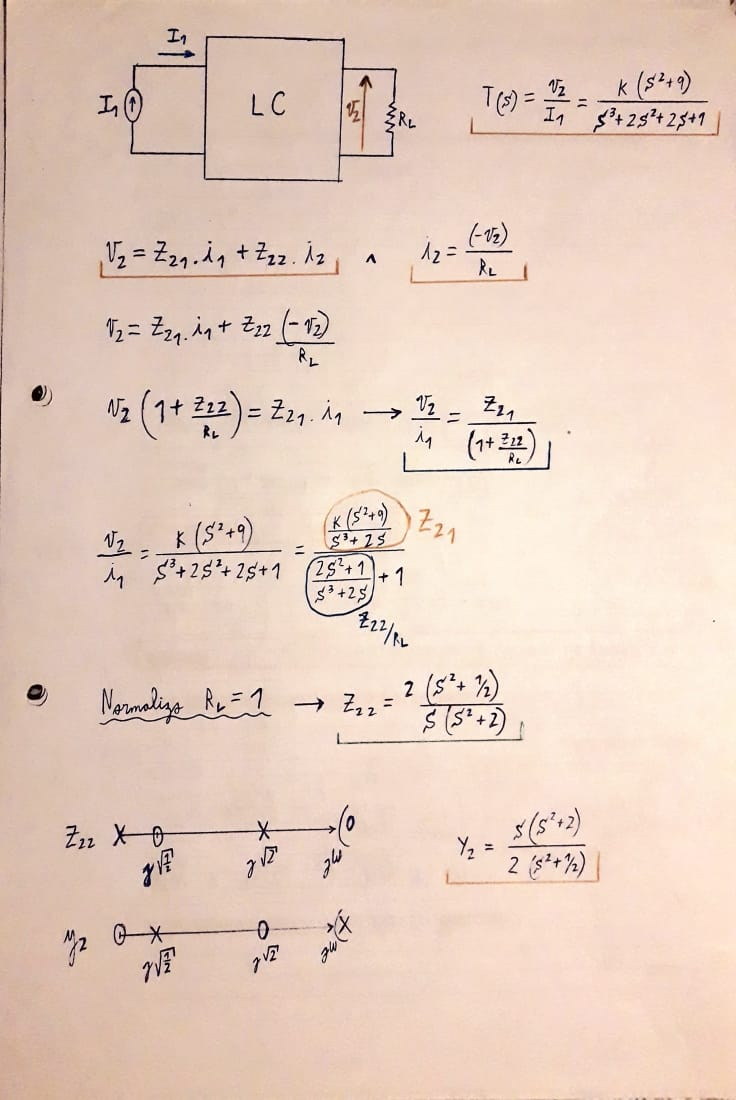

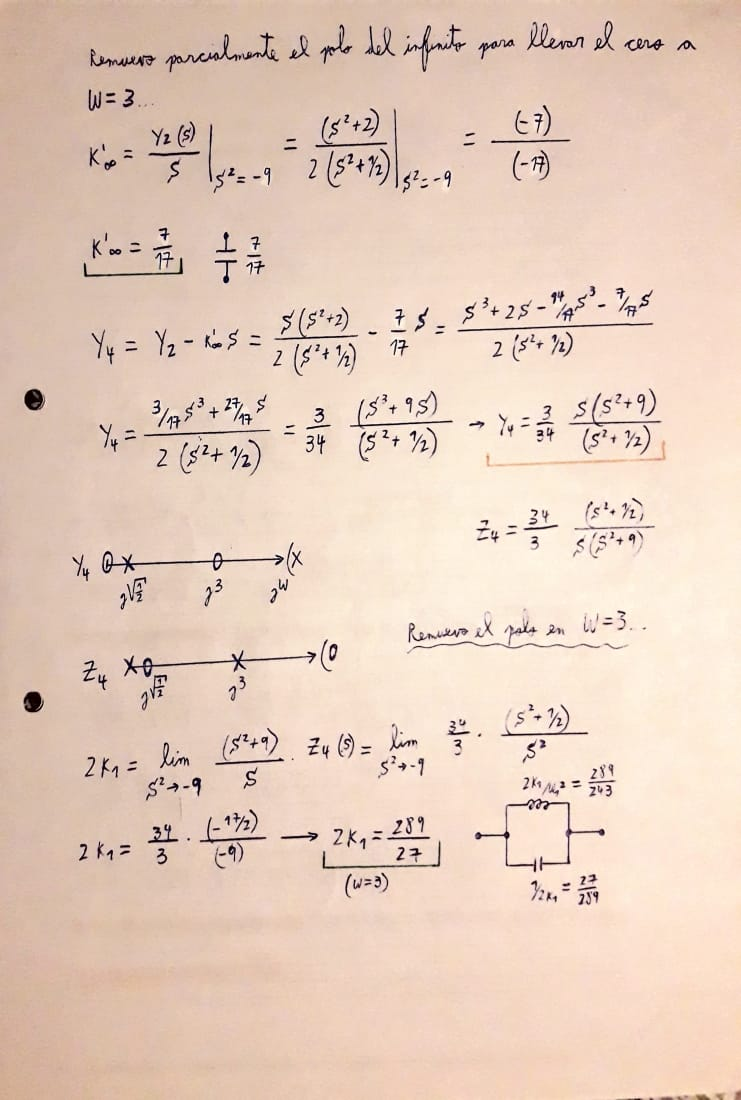

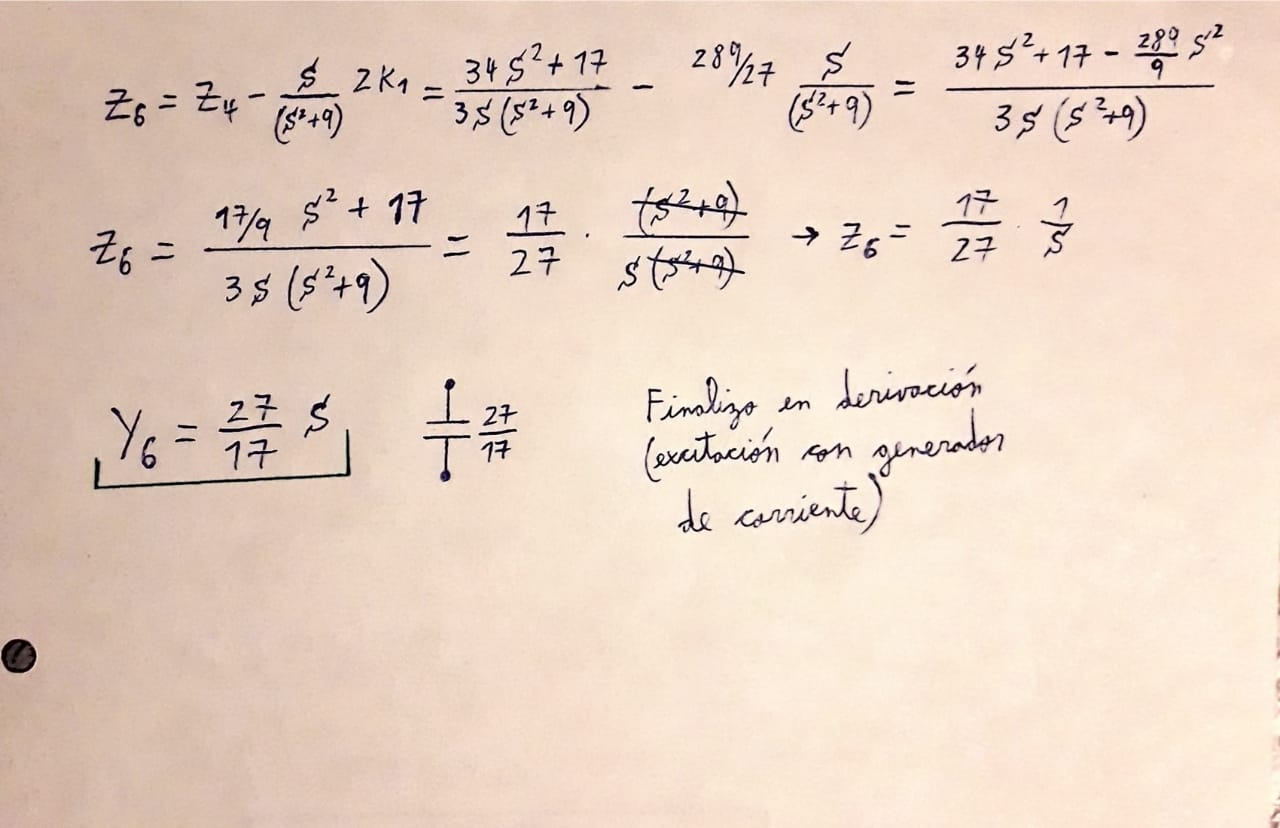

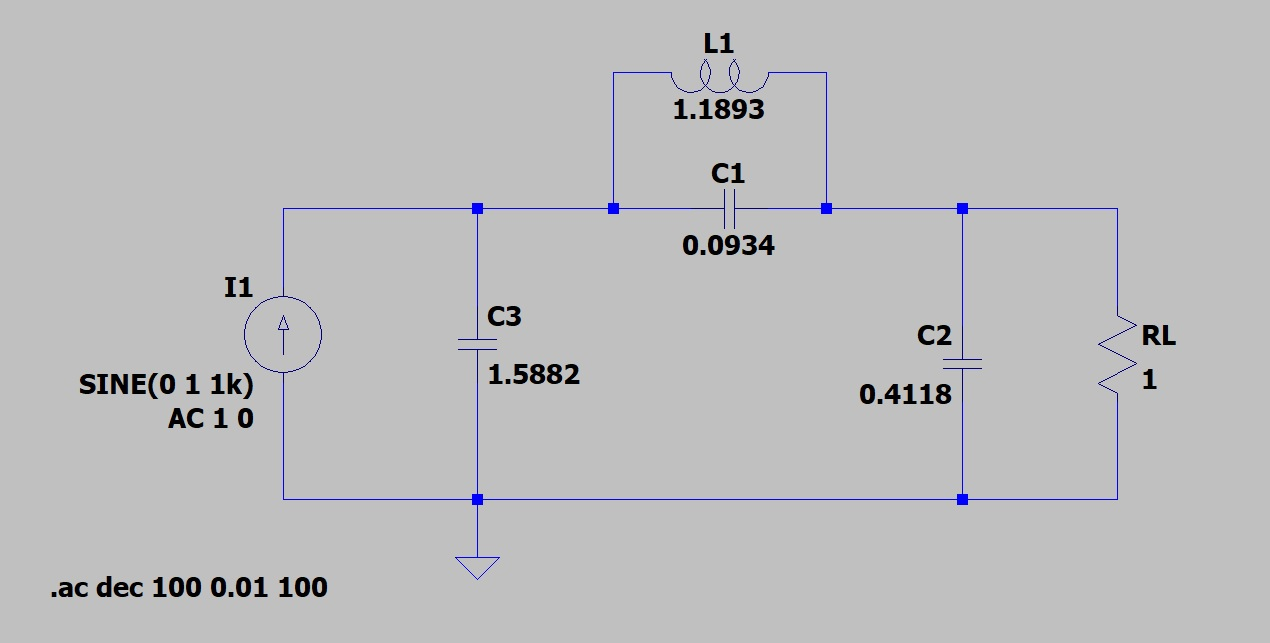

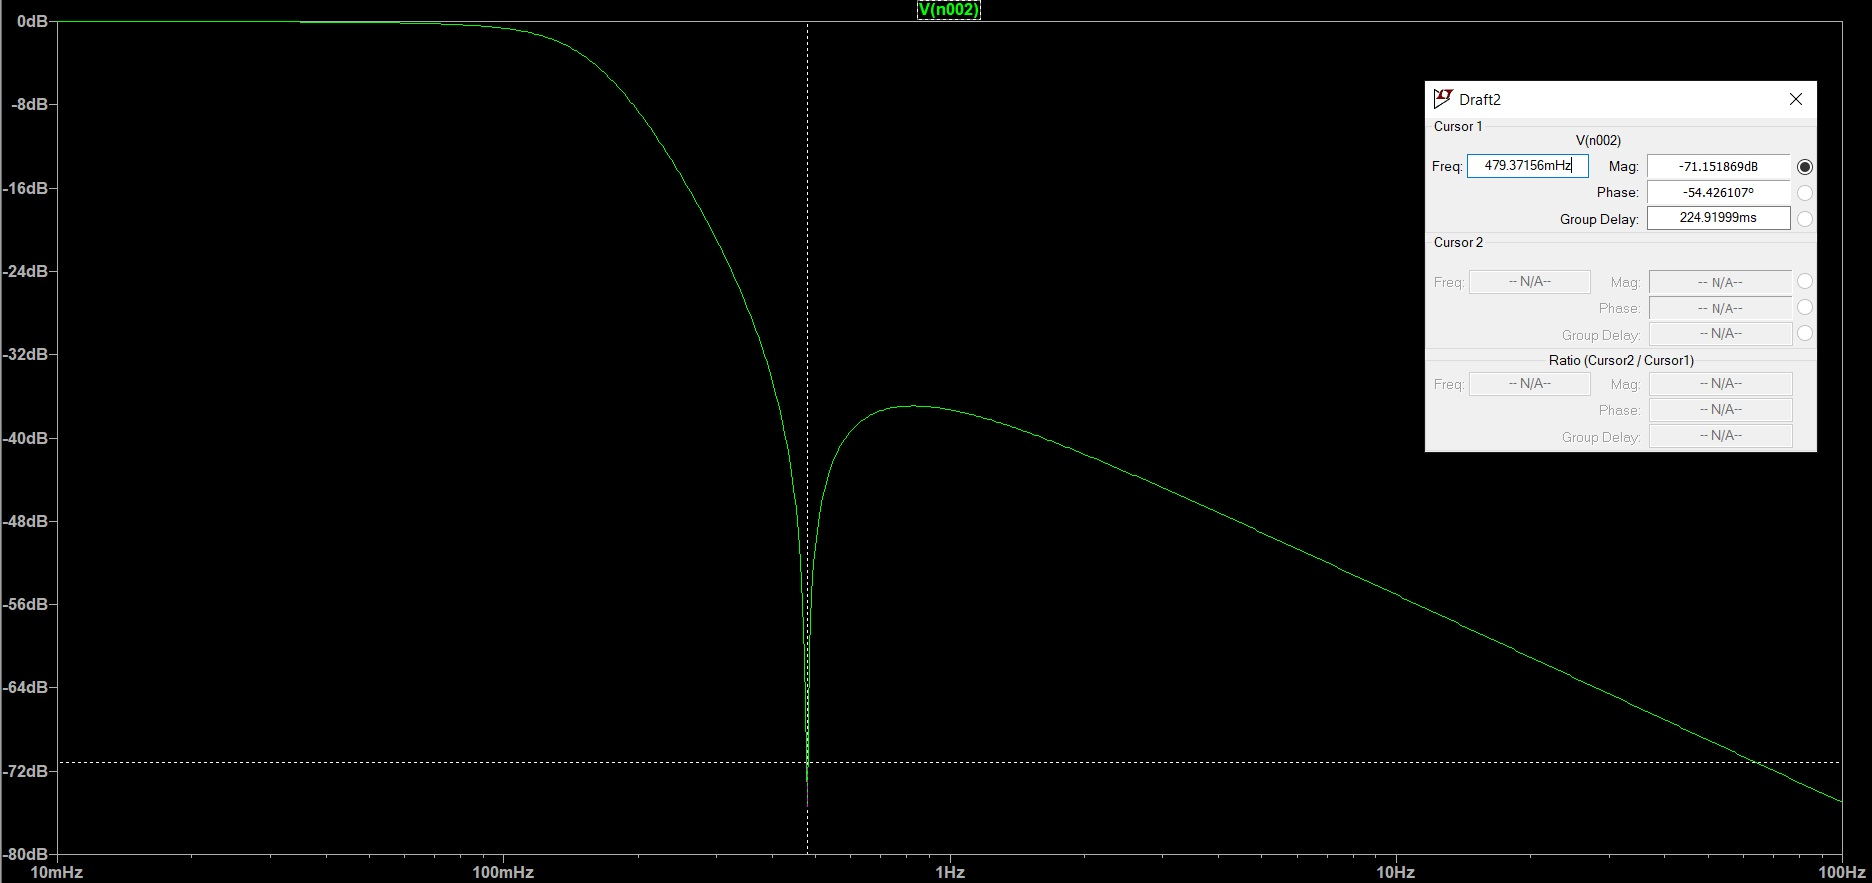

Hay varios comentarios para hacer del análisis circuital:

_Se observa un cero en $f=479mHz \cong \omega = 3 \frac{rad}{s}$ 

_Hay una tendencia a un cero en el infinito

_A frecuencia cero se tiene una constante (0dB) y se puede obtener el valor de $k=\frac{1}{9}$



In [2]:
ZZ = 2*(s**2+sp.Rational('1/2'))/(s**3+2*s)

RL = 1

#Remuevo parcialmente el polo en infinito para llevar el cero a omega=3
Y4, YC1 = tc2.remover_polo_infinito(1/ZZ, omega_zero = 3 )

#Obtengo el valor del componente

C1 = YC1/s

#Remuevo el polo en s=j3

Z6, Z5, L1, C2 = tc2.remover_polo_jw(1/Y4, omega = 3, isImpedance = True  )

#Obtengo el ultimo componente

Y8, YC3 = tc2.remover_polo_infinito(1/Z6)

C3 = YC3/s

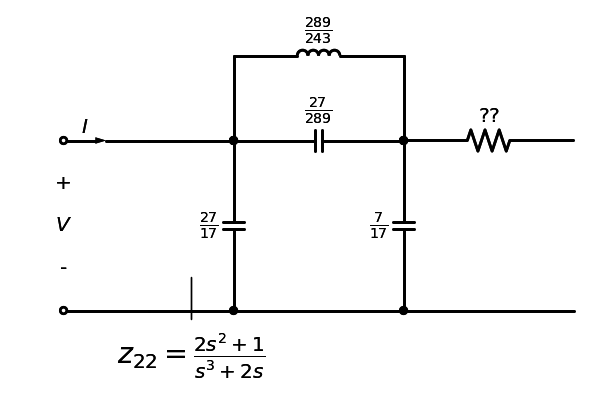

In [3]:
d = Drawing(unit=4)  # unit=2 makes elements have shorter than normal leads

d = tc2.dibujar_puerto_entrada(d,
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d, zz_lbl = tc2.dibujar_funcion_exc_abajo(d, 
                                          'z_{22}',  
                                          ZZ, 
                                          hacia_salida = False,
                                          k_gap_width = 0.5)

d = tc2.dibujar_elemento_derivacion(d, Capacitor, C3)
d = tc2.dibujar_tanque_serie(d, L1, C2)
d = tc2.dibujar_elemento_derivacion(d, Capacitor, C1)
d = tc2.dibujar_elemento_serie(d, Resistor, RL)

display(d)